# Noise model diagnostics: residuals autocorrelation over time

This example introduces two noise model diagnostics which are useful for studying the autocorrelation in time series noise.

The general procedure we follow in this notebook is to start by performing a fit assuming an IID noise process. Next, we generate the diagnostic plots from the IID residuals, and see if they suggest that a correlated noise process would be applicable.

The two diagnostics demonstrated in this notebook are `pints.residuals_diagnostics.plot_residuals_distance` and `pints.residuals_diagnostics.plot_residuals_binned_autocorrelation`. Both methods can take either a single best fit parameter or an MCMC chain of posterior samples (when the MCMC chain is provided, the posterior median of the residuals will be used). 

Another diagnostic plot for autocorrelation in the noise process is shown in [Evaluating noise models using autocorrelation plots of the residuals](residuals-autocorrelation.ipynb). Pints also includes diagnostic plots to study the magnitude of a noise process, which are demonstrated in [Noise model variance diagnostic plots](residuals-variance-diagnostics.ipynb).

## Residuals distance matrix

This diagnostic plot is a distance matrix of the residuals. Correlated noise, such as AR(1) (autoregressive order 1), will cause the distance matrix to exhibit a banded appearance. First, we generate synthetic data according to the logistic model and add IID noise.

In [1]:
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Use the toy logistic model
model = toy.LogisticModel()

real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 100)
org_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
noise = 50
values = org_values + np.random.normal(0, noise, org_values.shape)

# Set up the problem and run the optimisation 
problem = pints.SingleOutputProblem(model, times, values)

score = pints.SumOfSquaresError(problem)
boundaries = pints.RectangularBoundaries([0, 200], [1, 1000])
x0 = np.array([0.5, 500])

found_parameters, found_value = pints.optimise(
    score,
    x0,
    boundaries=boundaries,
    method=pints.XNES,
    )

print('Score at true solution: ')
print(score(real_parameters))

print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

Minimising error measure
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      5420881    0:00.0
1     12     4950978    0:00.0
2     18     4297957    0:00.0
3     24     4297957    0:00.0
20    126    1573108    0:00.0
40    246    1415027    0:00.1
60    366    224091.2   0:00.1
80    486    212865.3   0:00.1
100   606    212761.5   0:00.1
120   726    212761.4   0:00.1
140   846    212761.4   0:00.2
160   966    212761.4   0:00.2
180   1086   212761.4   0:00.2
200   1206   212761.4   0:00.2
220   1326   212761.4   0:00.3
240   1446   212761.4   0:00.3
260   1566   212761.4   0:00.3
280   1686   212761.4   0:00.3
300   1806   212761.4   0:00.4
320   1926   212761.4   0:00.4
340   2046   212761.4   0:00.4
360   2166   212761.4   0:00.4
380   2286   212761.4   0:00.5
400   2406   212761.4   0:00.5
420   2520   212761.4   0:00.5
Halting: No significant change for 200 iterations.
Score at true solut

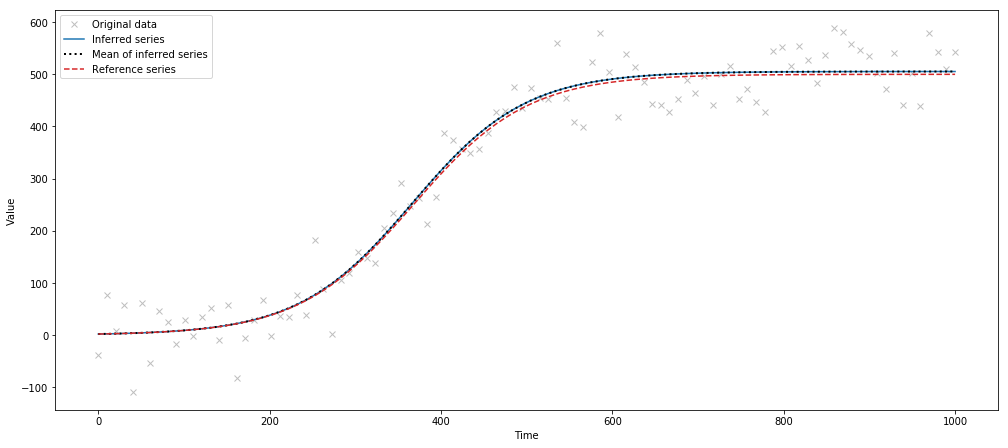

In [2]:
fig, ax = pints.plot.series(np.array([found_parameters]), problem, ref_parameters=real_parameters)
fig.set_size_inches(15, 7.5)
plt.show()

Next, we generate a similar time series, this time with AR(1) noise. 

In [3]:
# Add independent Gaussian noise
rho = 0.85
sigma = 50
values = org_values + pints.noise.ar1(rho, sigma, len(org_values))

# Set up the problem and run the optimisation 
problem_ar1 = pints.SingleOutputProblem(model, times, values)

score = pints.SumOfSquaresError(problem_ar1)
boundaries = pints.RectangularBoundaries([0, 200], [1, 1000])
x0 = np.array([0.5, 500])

found_parameters_ar1, found_value_ar1 = pints.optimise(
    score,
    x0,
    boundaries=boundaries,
    method=pints.XNES,
    )

Minimising error measure
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      7173209    0:00.0
1     12     4370674    0:00.0
2     18     4370674    0:00.0
3     24     4360642    0:00.0
20    126    565097.3   0:00.0
40    246    201604.7   0:00.1
60    366    200518.6   0:00.1
80    486    200518.5   0:00.1
100   606    200518.5   0:00.1
120   726    200518.5   0:00.2
140   846    200518.5   0:00.2
160   966    200518.5   0:00.2
180   1086   200518.5   0:00.2
200   1206   200518.5   0:00.3
220   1326   200518.5   0:00.3
240   1446   200518.5   0:00.3
260   1566   200518.5   0:00.3
280   1686   200518.5   0:00.3
300   1806   200518.5   0:00.4
320   1926   200518.5   0:00.4
340   2040   200518.5   0:00.4
Halting: No significant change for 200 iterations.


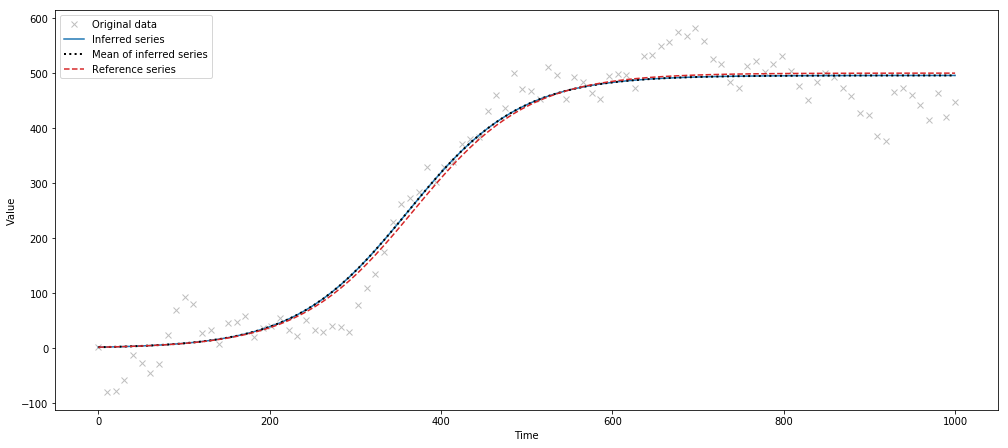

In [4]:
fig, ax = pints.plot.series(np.array([found_parameters_ar1]), problem_ar1, ref_parameters=real_parameters)
fig.set_size_inches(15, 7.5)
plt.show()

Finally, we plot the distance matrix between the residuals for the time series generated above. The plot can be created using the `pints.residuals_diagnostics.plot_residuals_distance` function, which takes as input the fitted parameters and the Pints problem.

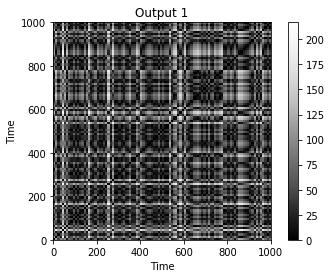

In [5]:
from pints.residuals_diagnostics import plot_residuals_distance

# Plot the distance matrix of the residuals for IID noise
fig = plot_residuals_distance(np.array([found_parameters]),
                              problem)

plt.show()

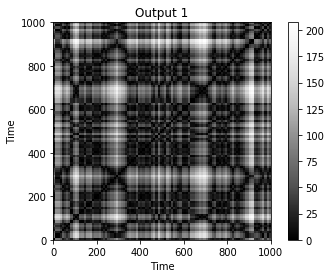

In [6]:
# Plot the distance matrix of the residuals for AR(1) noise
fig = plot_residuals_distance(np.array([found_parameters_ar1]),
                              problem_ar1)

plt.show()

Comparing the two figures above, the matrix for the AR(1) noise time series clearly shows a banded appearance. This plot suggests that the IID noise assumption we made when fitting the model is probably inadequate, and we should rerun the fit using a correlated noise model.

## Binned residuals autocorrelation

The next diagnostic plot divides the time series into consecutive bins, and displays the lag 1 autocorrelation of the residuals calculated within each bin over time. This function is available from Pints using `pints.residuals_diagnostics.plot_residuals_binned_autocorrelation`. 

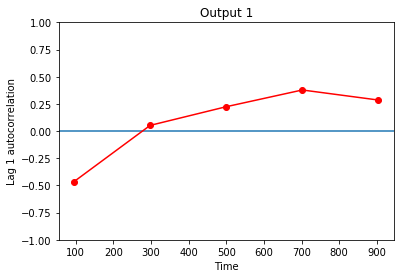

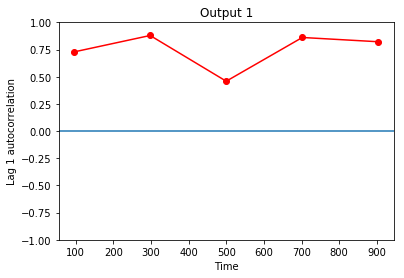

In [7]:
from pints.residuals_diagnostics import plot_residuals_binned_autocorrelation

fig = plot_residuals_binned_autocorrelation(
    np.array([found_parameters]),
    problem,
    n_bins=5
)

fig = plot_residuals_binned_autocorrelation(
    np.array([found_parameters_ar1]),
    problem_ar1,
    n_bins=5
)

plt.show()

Similar to the distance matrix diagnostic, these plots indicate a high autocorrelation over time for the problem with AR(1) noise.

The binned autocorrelation diagnostic is particularly helpful for detecting noise processes in which the level of correlation is changing over time. For a final example, we generate a time series with IID noise in the first half, and AR(1) noise in the second half. As before, we then fit the parameters assuming IID noise, and look at the diagnostic plots to evaluate the noise model.

In [8]:
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Use the toy logistic model
model = toy.LogisticModel()

real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 500)
org_values = model.simulate(real_parameters, times)

# Make half IID noise and half AR(1) noise
noise = 50
rho = 0.9
sigma = 50
values = org_values + \
    np.concatenate((np.random.normal(0, noise, len(org_values)//2), 
                    pints.noise.ar1(rho, sigma, len(org_values)//2)))

# Set up the problem and run the optimisation 
problem_mixed = pints.SingleOutputProblem(model, times, values)

score = pints.SumOfSquaresError(problem_mixed)
boundaries = pints.RectangularBoundaries([0, 200], [1, 1000])
x0 = np.array([0.5, 500])

found_parameters_mixed, found_value_mixed = pints.optimise(
    score,
    x0,
    boundaries=boundaries,
    method=pints.XNES,
    )

Minimising error measure
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      2.22e+07   0:00.0
1     12     2.19e+07   0:00.0
2     18     2.12e+07   0:00.0
3     24     2.1e+07    0:00.0
20    126    5127461    0:00.0
40    246    2661077    0:00.1
60    366    1186718    0:00.1
80    486    1186716    0:00.1
100   606    1186716    0:00.1
120   726    1186716    0:00.2
140   846    1186716    0:00.2
160   966    1186716    0:00.2
180   1086   1186716    0:00.3
200   1206   1186716    0:00.3
220   1326   1186716    0:00.3
240   1446   1186716    0:00.3
260   1566   1186716    0:00.4
280   1686   1186716    0:00.4
300   1806   1186716    0:00.4
320   1926   1186716    0:00.4
340   2046   1186716    0:00.5
344   2064   1186716    0:00.5
Halting: No significant change for 200 iterations.


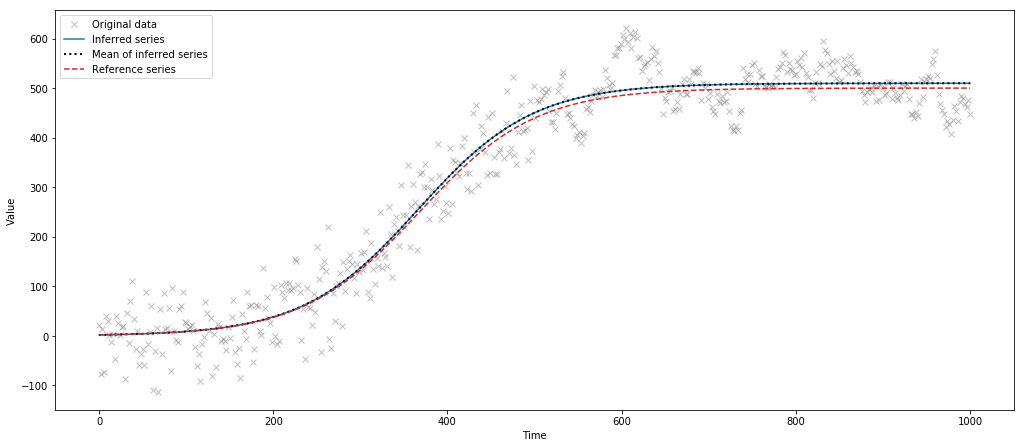

In [9]:
fig, ax = pints.plot.series(np.array([found_parameters_mixed]), problem_mixed, ref_parameters=real_parameters)
fig.set_size_inches(15, 7.5)
plt.show()

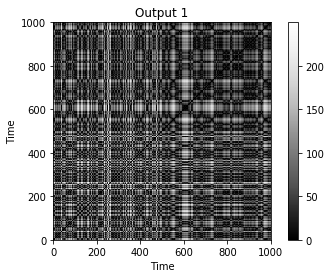

In [10]:
fig = plot_residuals_distance(np.array([found_parameters_mixed]),
                              problem_mixed)

plt.show()

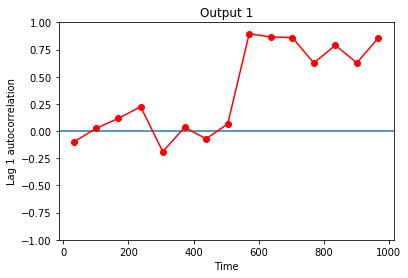

In [11]:
fig = plot_residuals_binned_autocorrelation(
    np.array([found_parameters_mixed]),
    problem_mixed,
    n_bins=15
)

plt.show()

Both of the two diagnostic plots shown above help to reveal the autocorrelated noise that appears in the second half of the time series, from t=500 to t=1000.